<a href="https://colab.research.google.com/github/humphrjk/Business_Analytics/blob/main/Pearson_Correlation_and_phi_kappa_correlation_w_significance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***You must run all the module in sequence to perform the analysis. To do this click the play button tothe left of each code segment. To run everything all at once you can choose Runtime in the file menu above and select Run All***

Load Pandas, Numpy, Matplotlib and Seaborn libraries. These are prewrittenmcode modules that do the calcualtions and visualizations in many Python codes. Below you will see the url= 'some web address' this is a file tat is stored somewhere on the web and will be accessed for this exercise.Load Pandas and import CSV file from URL

In [ ]:
!pip install phik
!pip install pingouin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import phik
import pingouin as pg
from phik.report import plot_correlation_matrix
from phik import report
url= 'https://github.com/humphrjk/Business_Analytics/files/9411284/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
df = pd.read_csv(url)

df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


**Performs the Pearson Correlation Calculations and creates the matrix**

In [ ]:
pearsoncorr = df.corr(method='pearson').round(3)
pearsoncorr

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000,0.382,0.289,0.115,0.293,0.086,0.125,0.212,-0.159,-0.054,...,0.023,0.041,0.408,0.087,0.213,0.273,0.044,0.279,-0.170,-0.224
HighBP,0.382,1.000,0.317,0.103,0.241,0.087,0.129,0.211,-0.136,-0.041,...,0.036,0.027,0.321,0.064,0.174,0.235,0.041,0.338,-0.142,-0.188
HighChol,0.289,0.317,1.000,0.086,0.131,0.093,0.100,0.181,-0.090,-0.047,...,0.032,0.033,0.238,0.084,0.143,0.162,0.017,0.240,-0.084,-0.108
CholCheck,0.115,0.103,0.086,1.000,0.046,-0.004,0.023,0.043,-0.008,0.017,...,0.107,-0.063,0.059,-0.011,0.035,0.044,-0.008,0.102,-0.009,0.008
BMI,0.293,0.241,0.131,0.046,1.000,0.012,0.023,0.060,-0.171,-0.085,...,-0.013,0.066,0.268,0.105,0.162,0.246,0.001,-0.039,-0.100,-0.125
Smoker,0.086,0.087,0.093,-0.004,0.012,1.000,0.065,0.124,-0.080,-0.075,...,-0.013,0.036,0.152,0.091,0.121,0.120,0.112,0.105,-0.141,-0.105
Stroke,0.125,0.129,0.100,0.023,0.023,0.065,1.000,0.223,-0.080,-0.009,...,0.006,0.036,0.189,0.087,0.164,0.192,0.004,0.124,-0.074,-0.137
HeartDiseaseorAttack,0.212,0.211,0.181,0.043,0.060,0.124,0.223,1.000,-0.098,-0.019,...,0.016,0.036,0.276,0.075,0.198,0.233,0.098,0.222,-0.097,-0.147
PhysActivity,-0.159,-0.136,-0.090,-0.008,-0.171,-0.080,-0.080,-0.098,1.000,0.134,...,0.027,-0.063,-0.274,-0.130,-0.234,-0.277,0.052,-0.101,0.190,0.197
Fruits,-0.054,-0.041,-0.047,0.017,-0.085,-0.075,-0.009,-0.019,0.134,1.000,...,0.029,-0.046,-0.099,-0.062,-0.049,-0.051,-0.089,0.061,0.099,0.079


**The code below creates a heat map of the Pearson Correlation Matrix that helps to find the well correlated and non-correlated variables. To the right you find the color for 1 and -1 used in this heatmap. The middle values are graduated between the two colors**
IF you want to change the color scheme you can change the cmap='value' and choose a gradient color from this website:
 https://matplotlib.org/stable/tutorials/colors/colormaps.html

Pearson Correlation Tables
https://www.real-statistics.com/statistics-tables/pearsons-correlation-table/

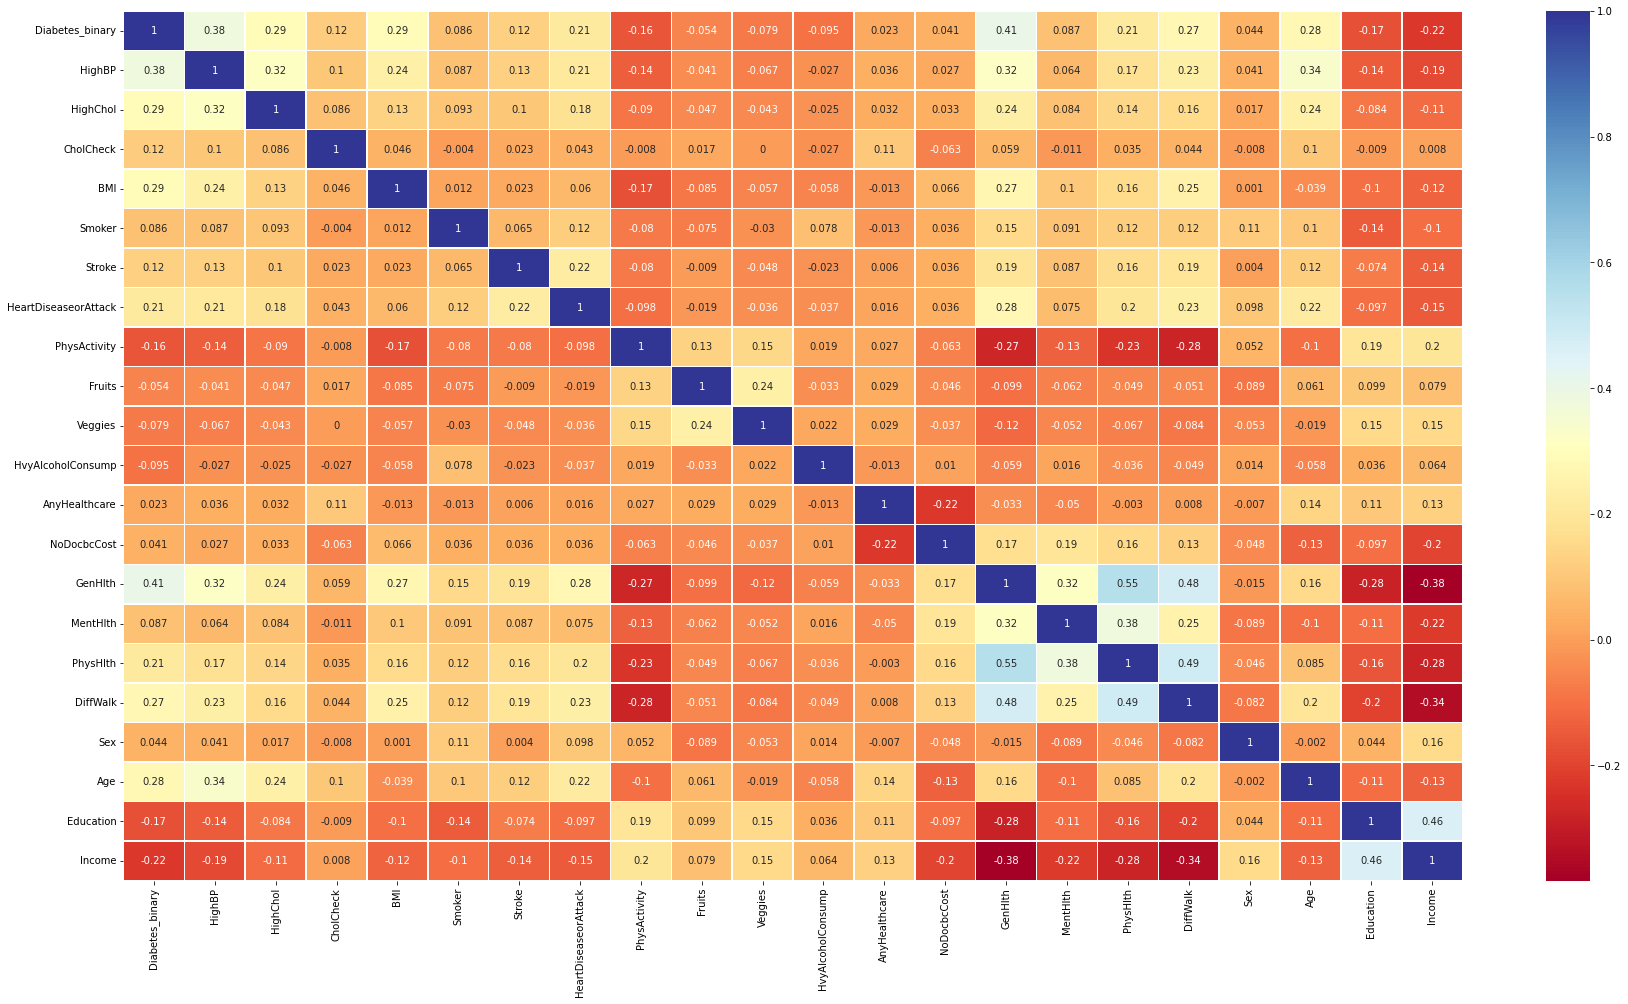

In [ ]:
sb.heatmap(pearsoncorr,
           xticklabels=pearsoncorr.columns,
           yticklabels=pearsoncorr.columns,
           cmap='RdYlBu',
           annot=True,
           linewidths=0.5,
)
plt.gcf().set_size_inches(30,16)

# **Here is where you perform the analysis of if the correlation is significant or not. you just change the varibles to compare in the calcualtion. The variables must be spelled just like they are on the axis above. Meaning the capitalization must be the same, or the calcuation will not work**

*In the results the r value is the correlation value and should match whats in the matrix value above. The P-val (p-value) displays the significance. Anything less than the number 0.05 is significant for this exercise.*

You can simply create a new code line and copy past the code from line 16 into the new code line and click play after you have changed the variable names between the "quotes".

In [ ]:
pg.corr(df["Education"],df["Income"])

,n,r,CI95%,p-val,BF10,power
pearson,70692,0.460565,"[0.45, 0.47]",0.0,inf,1.0


In [ ]:
pg.cronbach_alpha(data=df)

(0.33282902563444194, array([0.326, 0.34 ]))

# **The phi-k correlation is a new type of correlation value that is being adopted in data science. It gives a simular matrix to the pearson matrix. However it provides a signifigance matrix that eliminates the need to calcualte the significance manually for each observed correaltion as is done with the pearson matrix**

In [ ]:
#phik_overview = df.phik_matrix()


**Loads the names of the variables to name the axis columns and setup the matrix. If you change data sets the interval_col =["name", "name"] information must be changed to match the dataset**

In [ ]:
interval_cols = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
phik_overview = df.phik_matrix(interval_cols=interval_cols)


**Sets up the matrix to be displayed the font size can be adjusted and figsize numbers create the size of the matrix. These can be adjusted depending on the number of variables to make the matrix readable.**

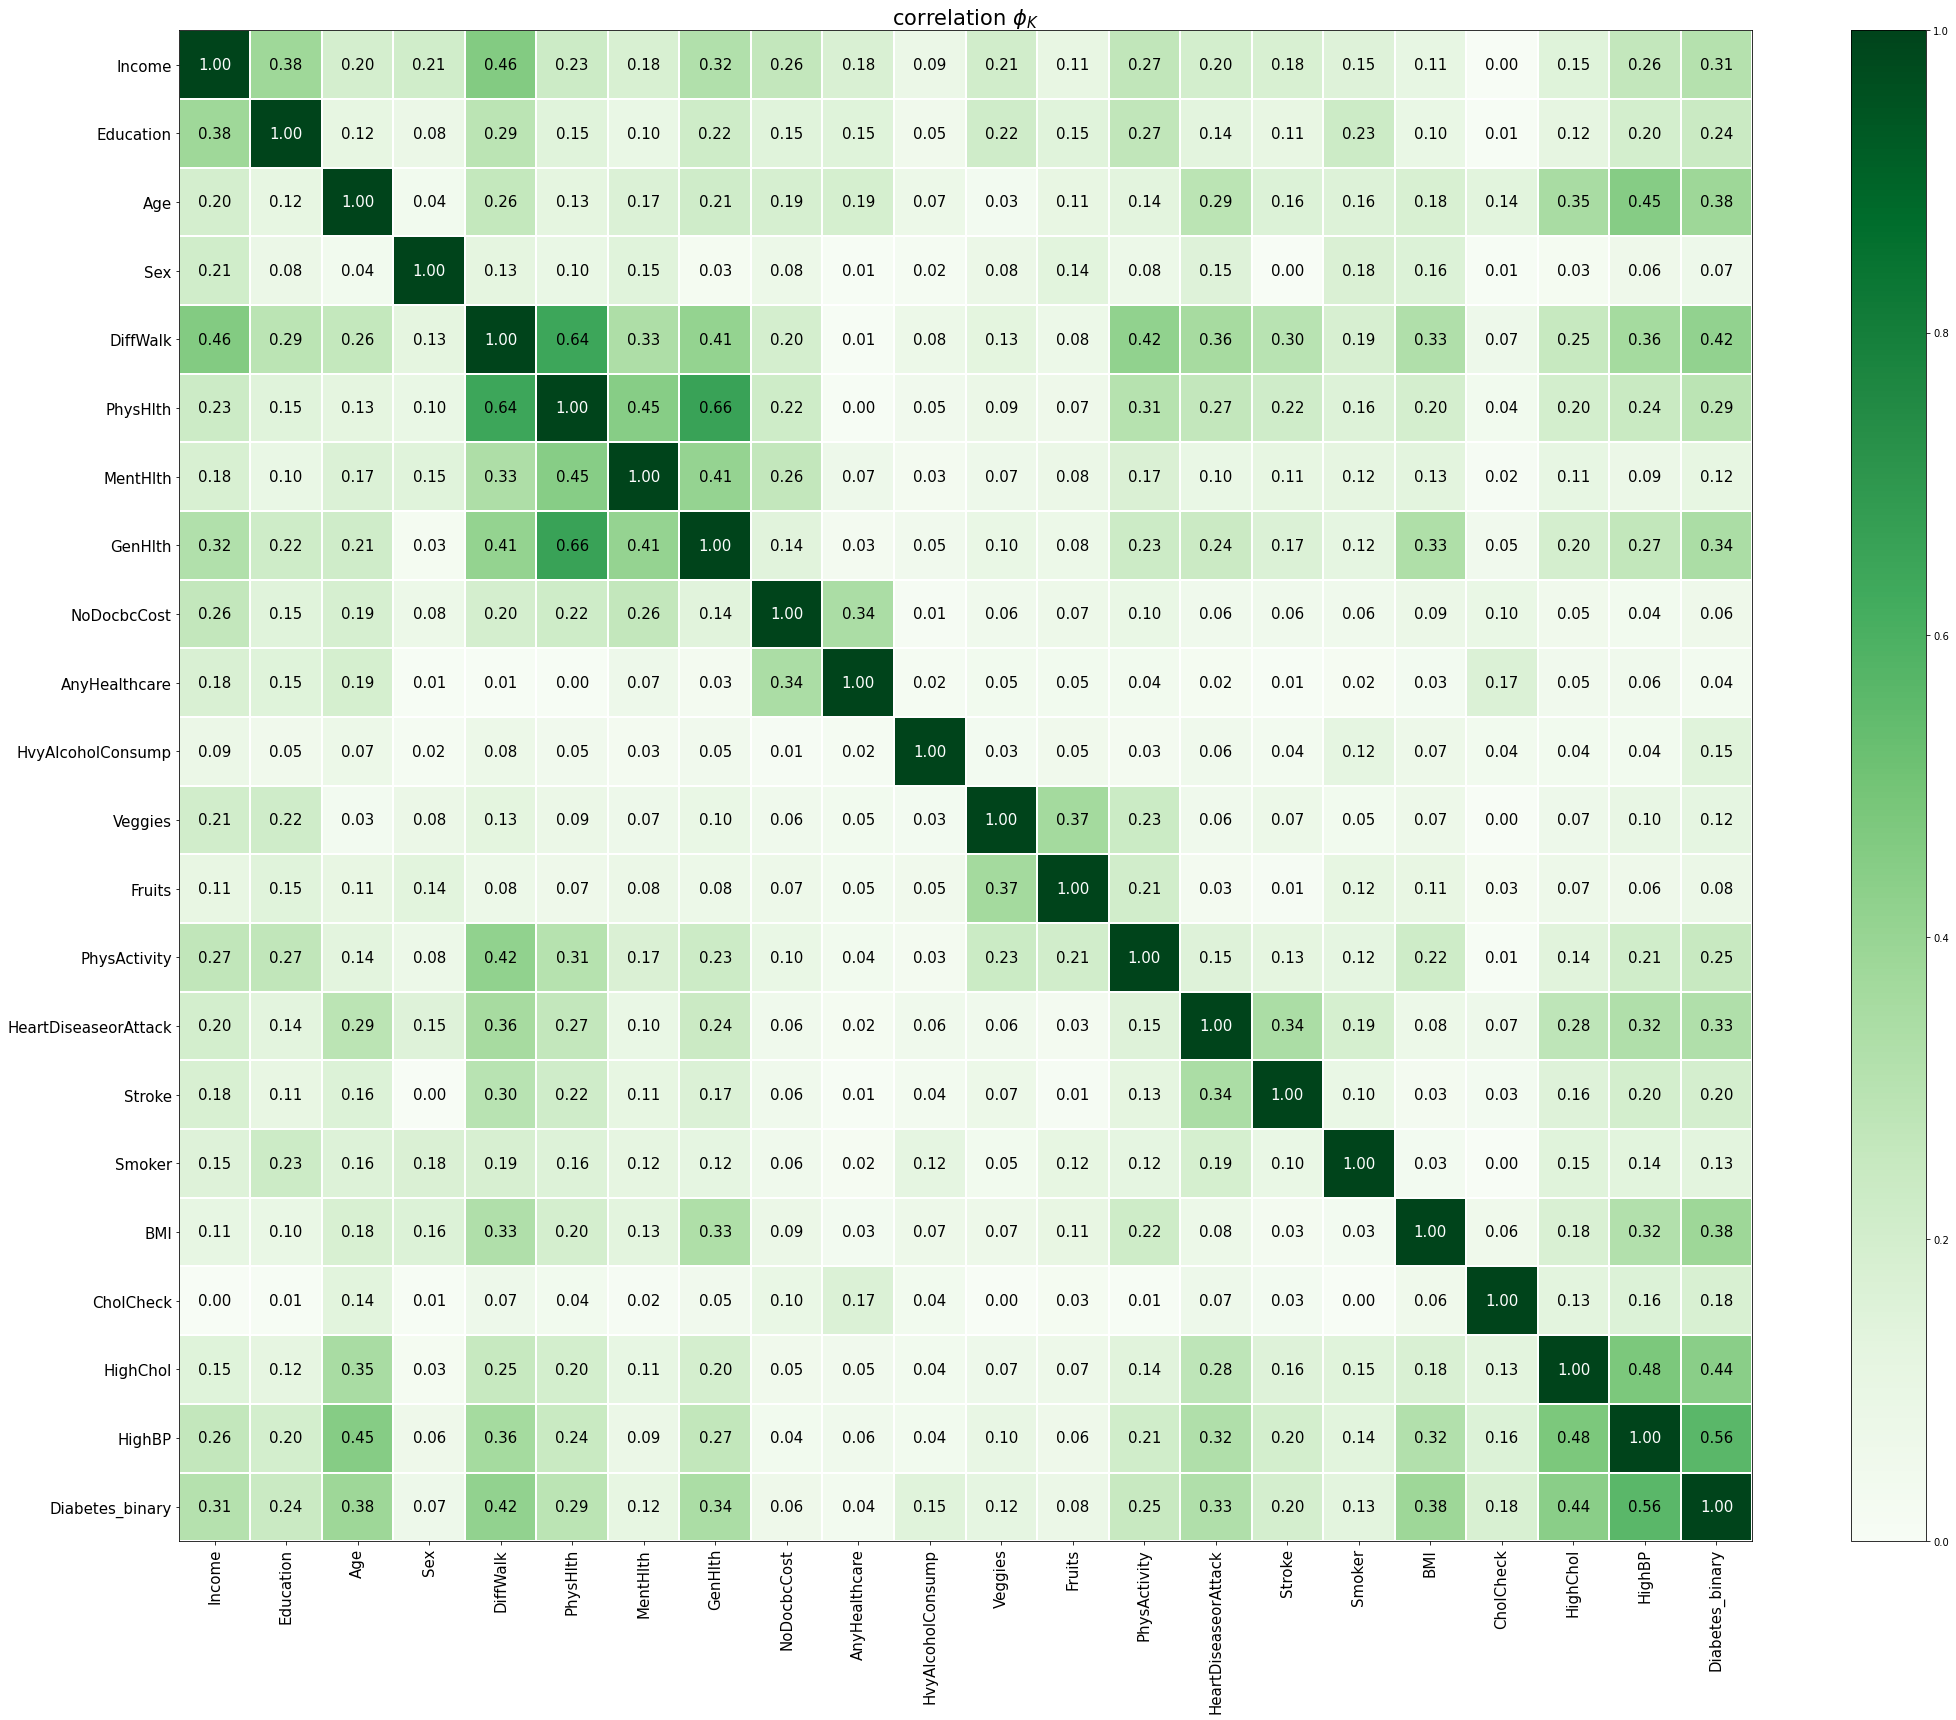

In [ ]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(30, 24))


**Produces the Significance matrix for the correlation table above. The values for level  of significance are found ont the colored scale on the right side of the matrix. The higher anthing larger or more negative than the scale is significant**

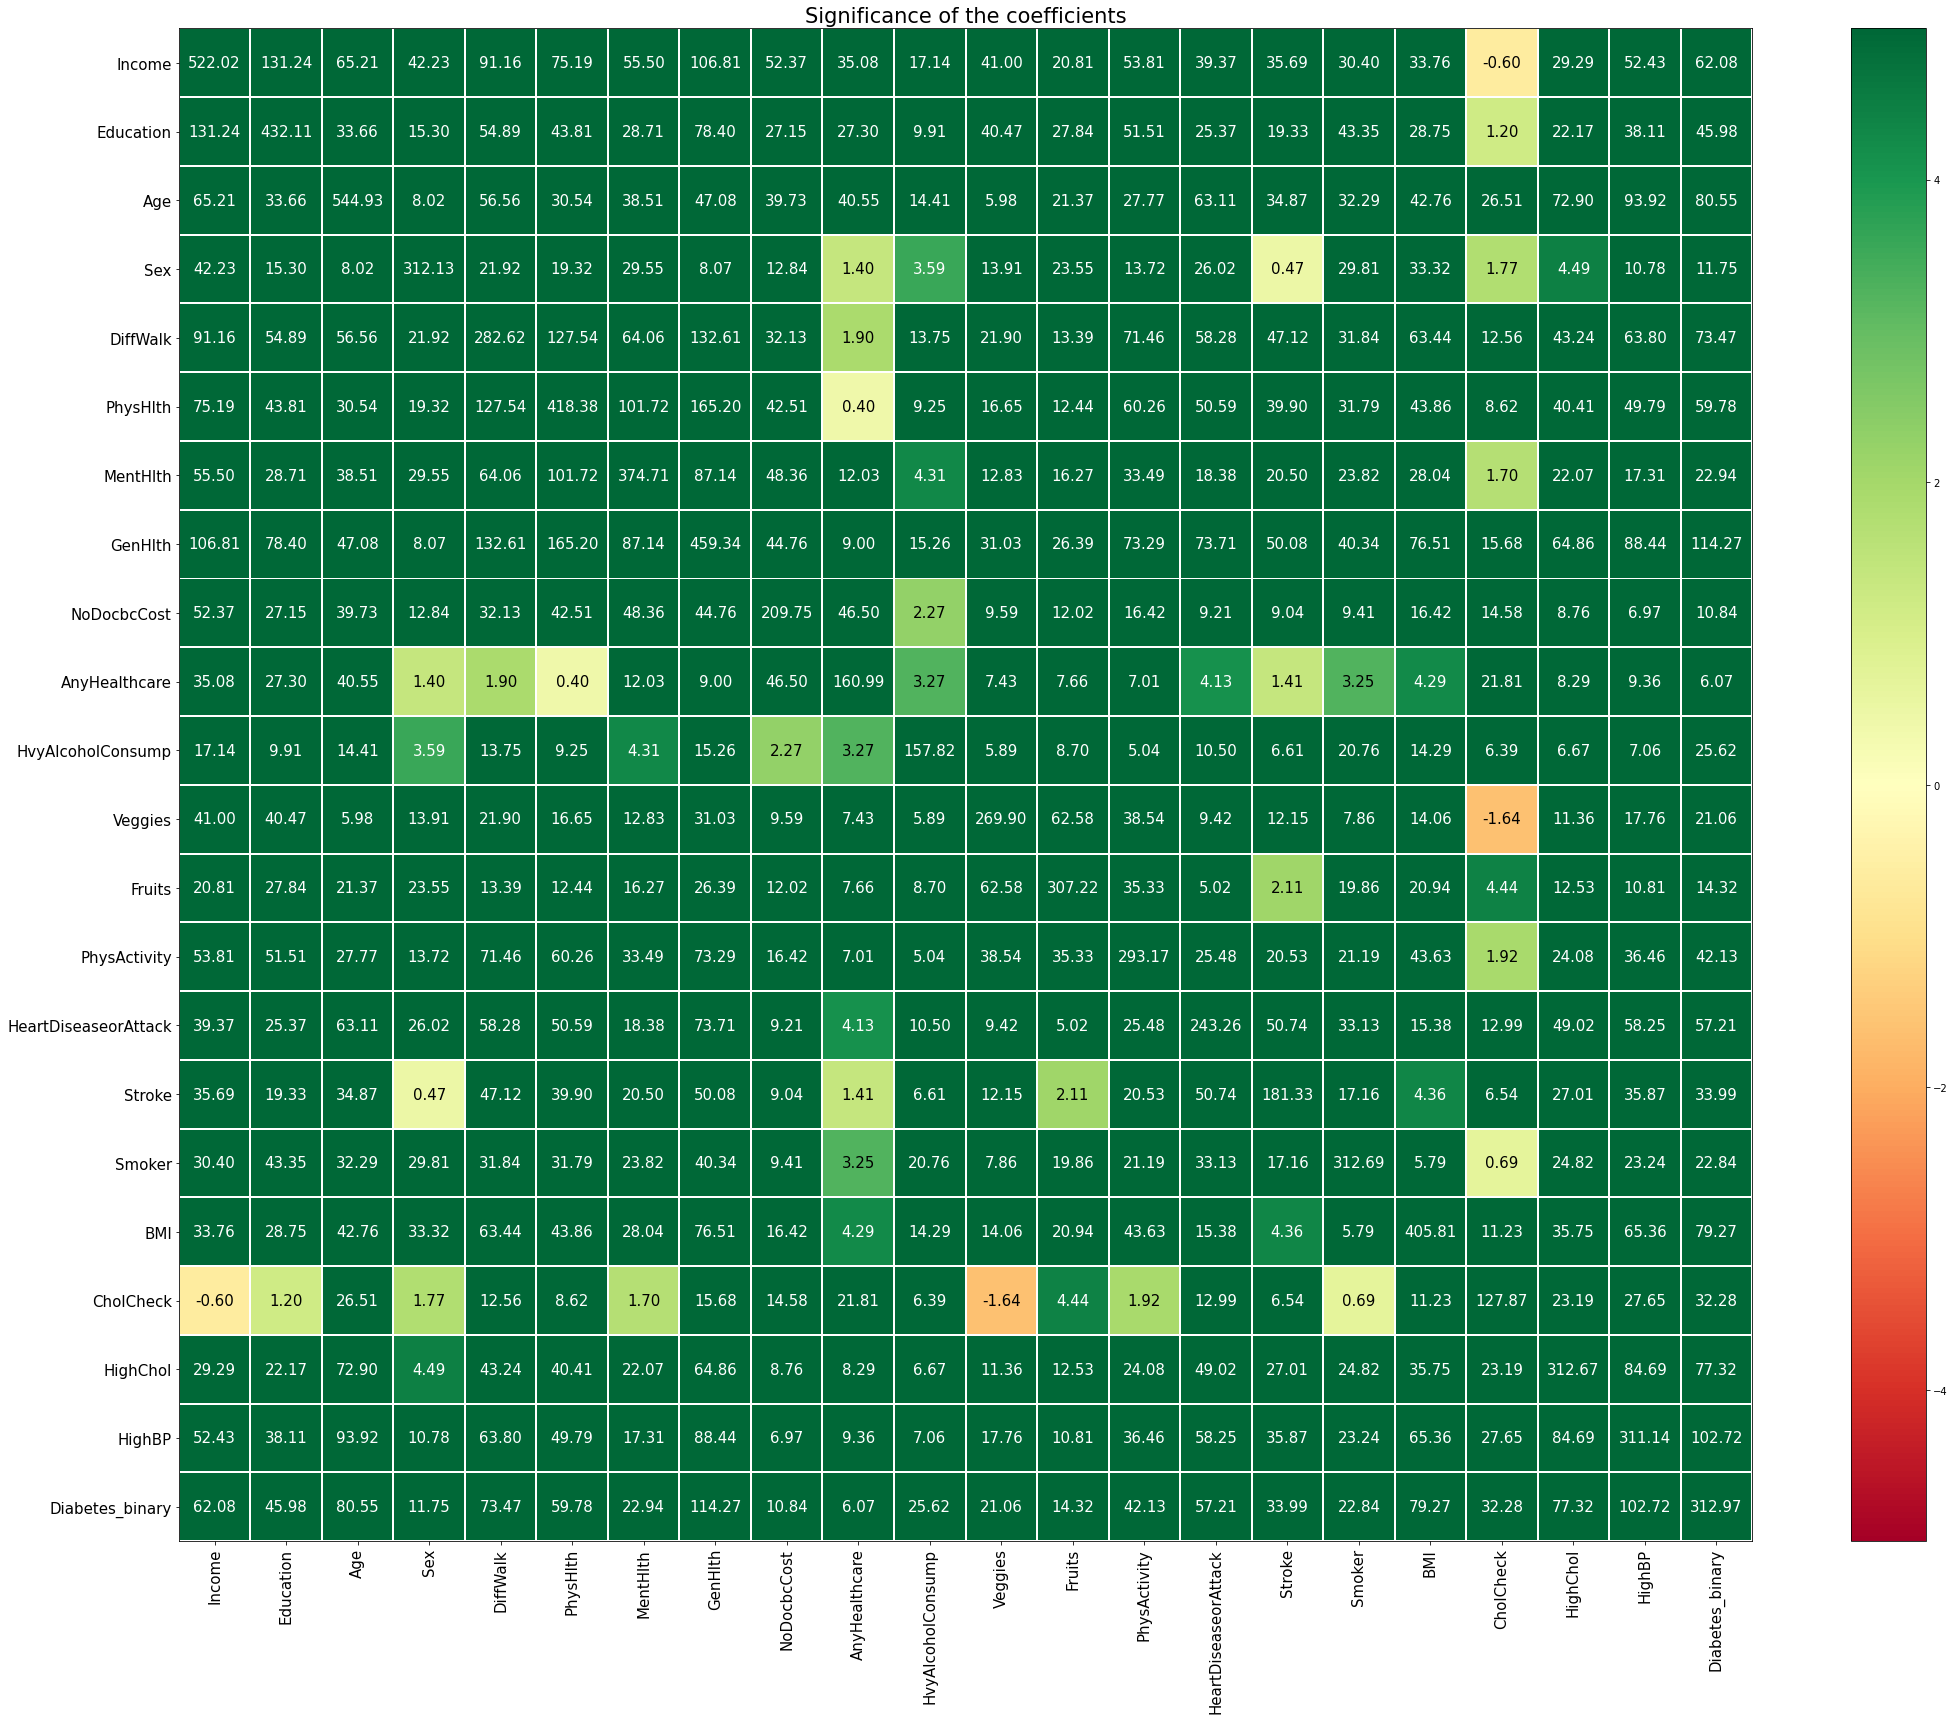

In [ ]:
significance_overview = df.significance_matrix(interval_cols=interval_cols)
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=1.5, figsize=(30, 24))
plt.tight_layout()